In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import anndata as ad
import scipy as sp

In [2]:
adata = sq.datasets.seqfish()

In [3]:
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

In [4]:
adata.layers['counts'] = adata.X.copy()

In [5]:
sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=10)

In [6]:
adata

AnnData object with n_obs × n_vars = 19402 × 351
    obs: 'Area', 'celltype_mapped_refined', 'n_genes'
    var: 'n_cells'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'

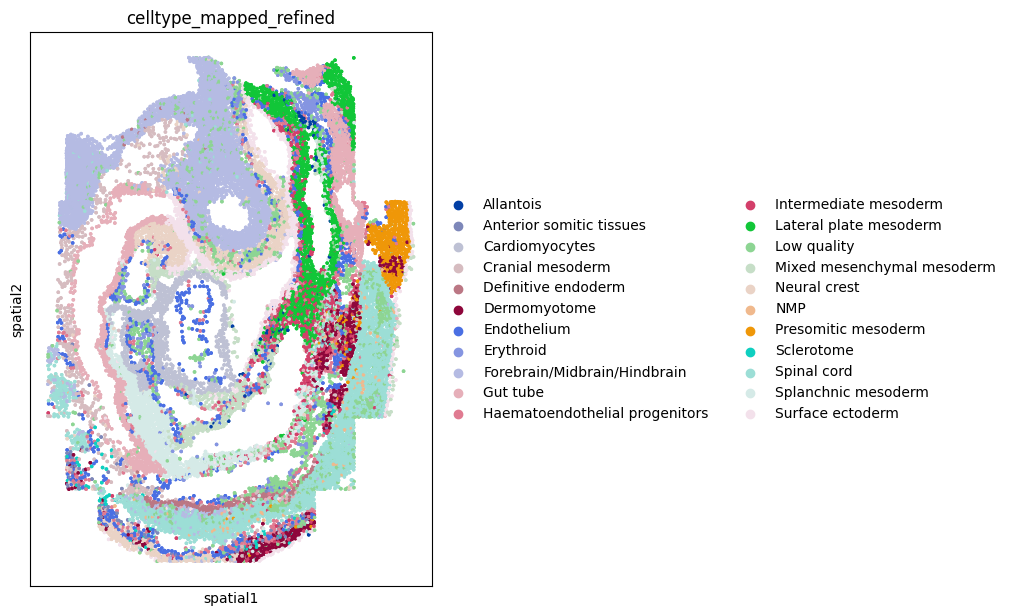

In [7]:
sq.pl.spatial_scatter(adata, 
                      color=['celltype_mapped_refined'], size=10, shape=None,
                     figsize=(10, 10))

In [8]:
# remove MT genes
non_mito_genes_list = [name for name in adata.var_names if not name.startswith('mt-')]
adata = adata[:, non_mito_genes_list]

In [9]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [10]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(adata, mode="moran", 
                       n_perms=100, n_jobs=10, 
                       genes=adata.var_names)

100%|██████████| 100/100 [00:09<00:00, 10.01/s]


In [11]:
n_svgs = 25
sel_genes = (
    adata.uns["moranI"]["I"].sort_values(ascending=False).head(n_svgs).index.tolist()
)

In [12]:
adata.uns['moranI']

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Hoxb9,0.662104,0.000000e+00,0.000017,0.000000e+00,0.009901,0.000043,0.000000e+00,0.000000e+00,0.009901
Shh,0.631877,0.000000e+00,0.000017,0.000000e+00,0.009901,0.000033,0.000000e+00,0.000000e+00,0.009901
Meox1,0.629518,0.000000e+00,0.000017,0.000000e+00,0.009901,0.000037,0.000000e+00,0.000000e+00,0.009901
Foxf1,0.616886,0.000000e+00,0.000017,0.000000e+00,0.009901,0.000031,0.000000e+00,0.000000e+00,0.009901
Krt18,0.616039,0.000000e+00,0.000017,0.000000e+00,0.009901,0.000031,0.000000e+00,0.000000e+00,0.009901
...,...,...,...,...,...,...,...,...,...
Tgm1,0.033482,5.551115e-16,0.000017,0.000000e+00,0.009901,0.000013,5.615105e-16,0.000000e+00,0.009901
Ptprc,0.032104,7.216450e-15,0.000017,0.000000e+00,0.009901,0.000012,7.278660e-15,0.000000e+00,0.009901
Lefty1,0.028590,3.632539e-12,0.000017,1.443290e-14,0.009901,0.000014,3.653356e-12,1.443290e-14,0.009901
Lrrc46,0.028421,4.809375e-12,0.000017,0.000000e+00,0.009901,0.000009,4.823116e-12,0.000000e+00,0.009901


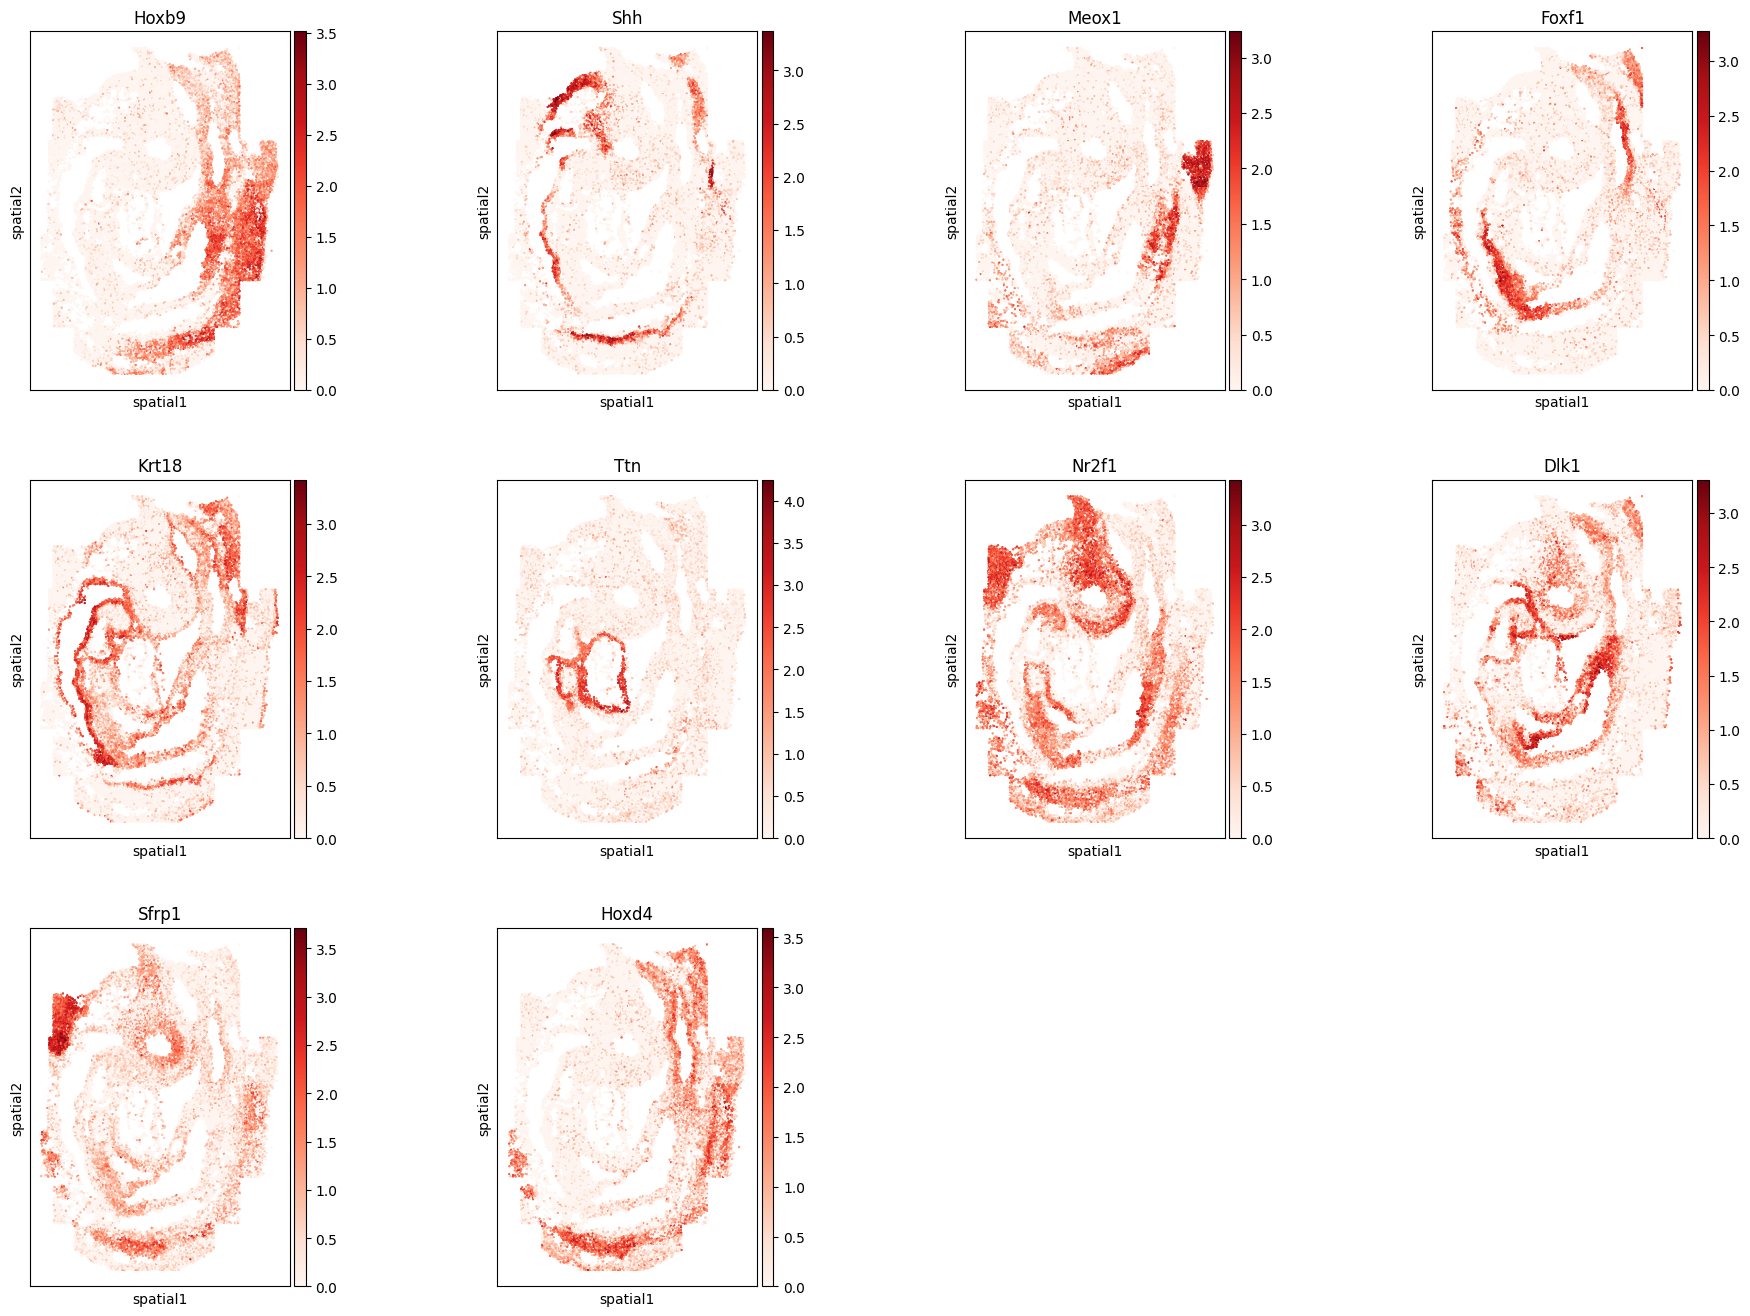

In [13]:
sq.pl.spatial_scatter(
    adata, color=sel_genes[:10], figsize=(5, 5), size=1, 
    cmap="Reds", shape=None, use_raw=False
)

In [14]:
# select top 50 variable genes as reference
adata = adata[:, sel_genes]

In [15]:
adata

View of AnnData object with n_obs × n_vars = 19402 × 25
    obs: 'Area', 'celltype_mapped_refined', 'n_genes'
    var: 'n_cells'
    uns: 'celltype_mapped_refined_colors', 'log1p', 'spatial_neighbors', 'moranI'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [16]:
adata.write_h5ad('../../results/00_prepare_reference_data/39_seqFISH_Mouse_Organogenesis.h5ad')